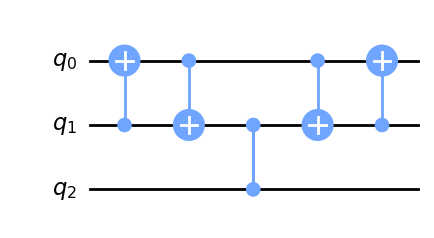

In [90]:
from qiskit import QuantumCircuit

qc1 = QuantumCircuit(3)
qc1.cx(1, 0)
qc1.cx(0, 1)
qc1.cz(1, 2)
qc1.cx(0, 1)
qc1.cx(1, 0)
qc1.draw("mpl")

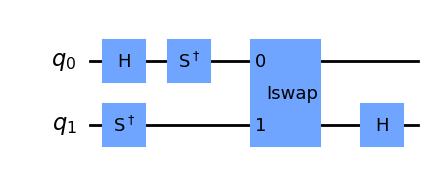

In [101]:
iswap_sub = QuantumCircuit(2)
iswap_sub.h(0)
iswap_sub.sdg(0)
iswap_sub.sdg(1)
iswap_sub.iswap(0, 1)
iswap_sub.h(1)
iswap_sub.draw("mpl")

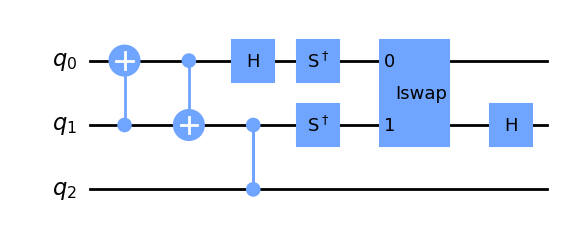

In [103]:
qc1 = QuantumCircuit(3)
qc1.cx(1, 0)
qc1.cx(0, 1)
qc1.cz(1, 2)
qc1.h(0)
qc1.sdg(0)
qc1.sdg(1)
qc1.iswap(0, 1)
qc1.h(1)
qc1.draw("mpl")

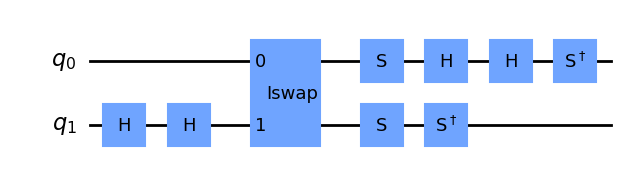

In [106]:
reverse_cx = QuantumCircuit(2)
reverse_cx.h(1)
reverse_cx.h(1)
reverse_cx.iswap(0, 1)
reverse_cx.s(0)
reverse_cx.s(1)
reverse_cx.h(0)
reverse_cx.h(0)
reverse_cx.sdg(0)
reverse_cx.sdg(1)
reverse_cx.draw("mpl")

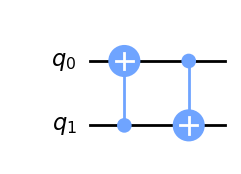

In [108]:
qc0 = QuantumCircuit(2)
qc0.cx(1, 0)
qc0.cx(0, 1)
qc0.draw("mpl")

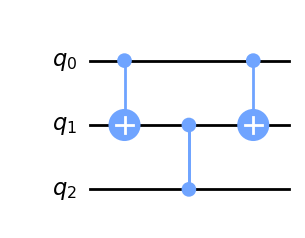

In [92]:
qc2 = QuantumCircuit(3)
# qc2.cx(1,0)
qc2.cx(0, 1)
qc2.cz(1, 2)
qc2.cx(0, 1)
# qc2.cx(1,0)
qc2.draw("mpl")

In [94]:
from qiskit.quantum_info import Operator

Operator(qc1).equiv(Operator(qc2))

False

In [96]:
qc3 = QuantumCircuit(2)
qc3.cx(0, 1)
qc3.cx(1, 0)
qc4 = QuantumCircuit(2)
qc4.cx(1, 0)
qc4.cx(0, 1)
Operator(qc3).equiv(Operator(qc4))

False

In [97]:
qc5 = QuantumCircuit(5)
qc5.iswap(0, 1)
print(Operator(qc3).equiv(Operator(qc5)))
print(Operator(qc4).equiv(Operator(qc5)))

False
False


In [99]:
from weylchamber import c1c2c3

print(c1c2c3(Operator(qc3).data))
print(c1c2c3(Operator(qc4).data))

(0.5, 0.5, 0.0)
(0.5, 0.5, 0.0)


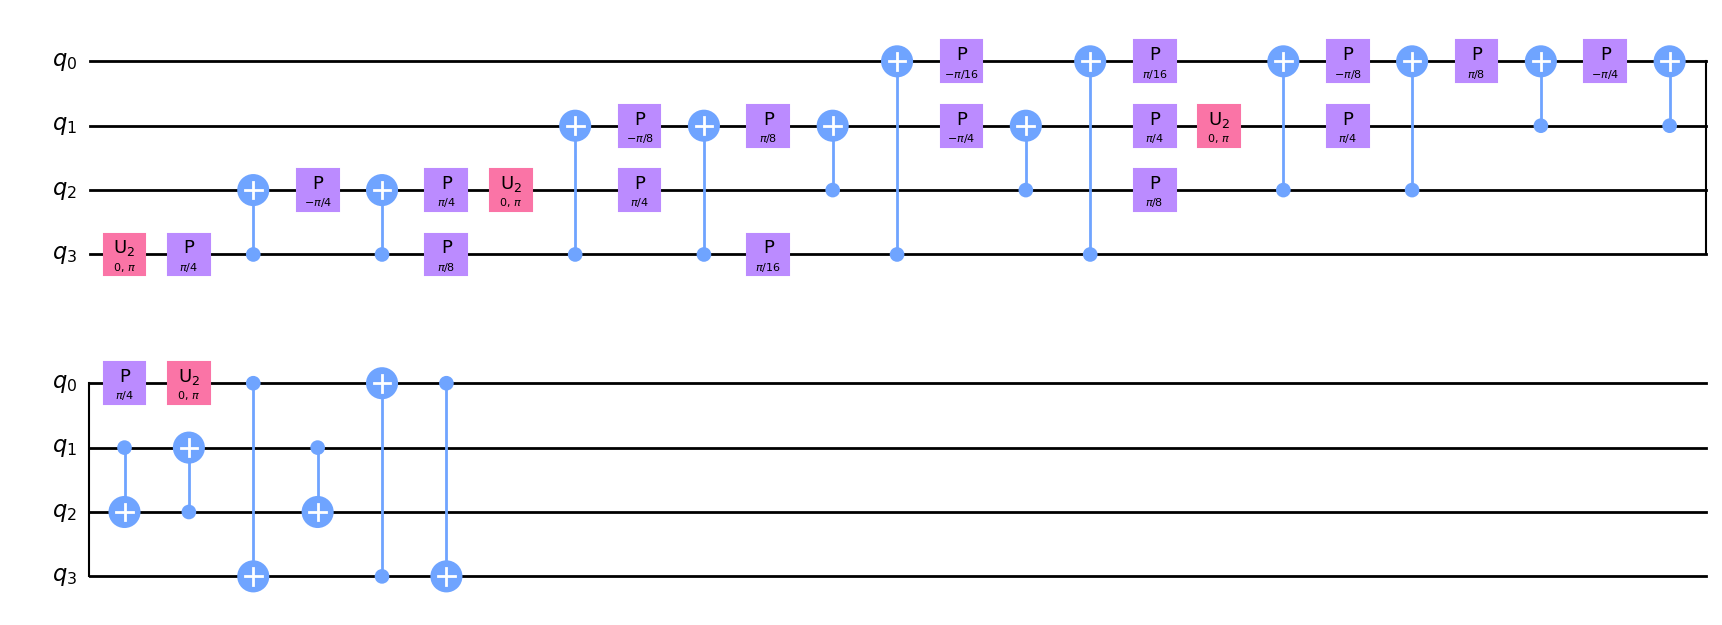

In [47]:
# use for making some figures of QFT circuit dag for the paper

from qiskit.circuit.library import QFT, TwoLocal

qc = QFT(4).decompose()
# qc = TwoLocal(4, ['ry'], 'cx', reps=1, entanglement='full', insert_barriers=False)
qc.decompose().draw(output="mpl")  # , filename="twolocal_base.svg")

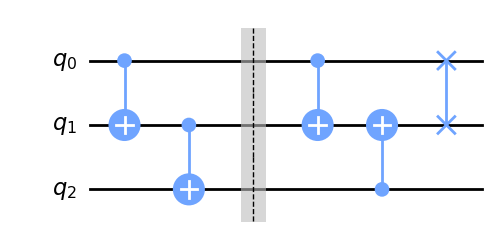

In [84]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.cx(0, 1)
qc.cx(1, 2)
qc.barrier()
qc.cx(0, 1)
qc.cx(2, 1)

qc.swap(0, 1)
qc.draw("mpl")

In [49]:
# line coupling_map
from qiskit.transpiler import CouplingMap

line = CouplingMap.from_line(3)
grid = CouplingMap.from_grid(2, 2)
topo = line

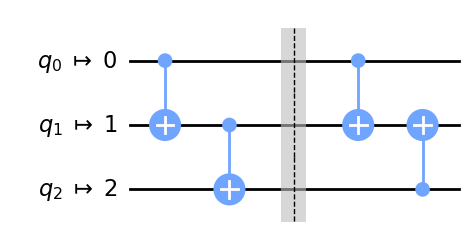

In [85]:
from qiskit import transpile

transp1 = transpile(
    qc, coupling_map=topo, optimization_level=3  # , initial_layout=[0, 1, 2, 3]
)
transp1.draw(output="mpl")  # , filename="twolocal_qiskit.svg")

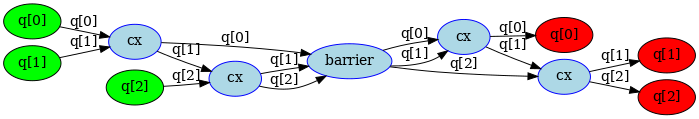

In [86]:
from qiskit.converters import circuit_to_dag

dag = circuit_to_dag(transp1)
# dag only keep 2Q nodes
for node in dag.topological_op_nodes():
    if node.op.num_qubits < 2:
        dag.remove_op_node(node)
dag.draw()

8


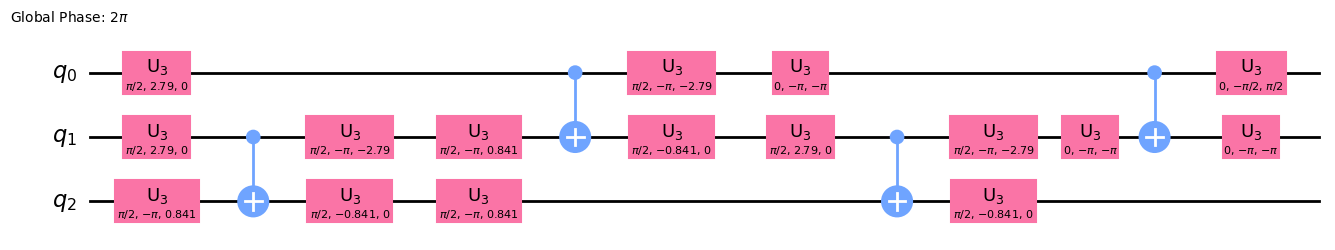

In [87]:
from virtual_swap.pass_managers import SabreVS, SabreQiskit
from qiskit.circuit.library import iSwapGate
from virtual_swap.pass_managers import SabreVS, SabreQiskit
from transpile_benchy.metrics import DepthMetric

for _ in range(1):
    runner = SabreVS(topo)  # , cx_basis=True)
    transp = runner.run(qc)
    # mid0 = runner.pm.property_set["mid0"]
    mid = runner.pm.property_set["circuit_progress"]
    print(runner.pm.property_set["monodromy_depth"])

    # if DepthMetric.calculate(transp) <= 22:
    #     break
mid.draw(output="mpl", fold=-1)  # , filename="twolocal_cns.svg")
transp.decompose().draw(output="mpl")

16
16
12
16
14


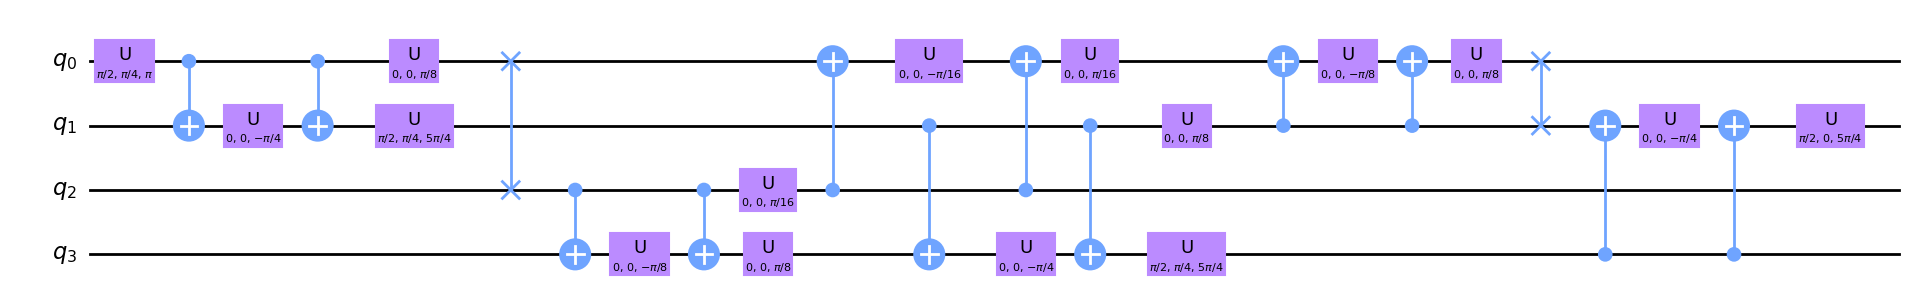

In [15]:
# set original qc to use
from qiskit import transpile

# qc2 = transpile(qc, initial_layout=runner.pm.property_set["layout"], coupling_map=coupling_map)
# qc2 = transpile(qc, coupling_map=coupling_map, optimization_level=3)
for _ in range(5):
    pm2 = SabreQiskit(topo)  # , cx_basis=True)
    qc2 = pm2.run(qc)
    mid = pm2.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(qc2))
mid.draw(output="mpl", fold=-1)

In [7]:
from qiskit.converters import circuit_to_dag

# remove 1Q nodes
dag = circuit_to_dag(mid_qc)
for node in dag.topological_op_nodes():
    if node.op.num_qubits < 2:
        dag.remove_op_node(node)
dag.draw()

NameError: name 'mid_qc' is not defined

In [ ]:
pm.pm.property_set["layout"]

Layout({
2: Qubit(QuantumRegister(4, 'q'), 0),
1: Qubit(QuantumRegister(4, 'q'), 1),
3: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})